In [3]:
import pandas as pd
import sys
sys.path.append('/home/suraj/Repositories/Hacker Earth Challenge/hackerearthchallenge')
from functions import read_file, remove_redundant_fields, transform_columns
import pickle
import h5py
from keras.models import load_model
from sklearn.externals import joblib
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [29]:
dataframe = read_file('/home/suraj/Repositories/Hacker Earth Challenge/hackerearthchallenge/test_indessa.csv')

In [30]:
dataframe.head(10)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,...,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,...,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,...,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0
5,28822038,13475,13475,13475.0,60 months,,18.99,E,E1,Human Resource,...,0.0,0.0,NaN,INDIVIDUAL,NaN,70th week,0.0,131.0,29383.0,42700.0
6,10718089,5000,5000,5000.0,36 months,,7.62,A,A3,Software Engineer,...,0.0,0.0,NaN,INDIVIDUAL,NaN,74th week,0.0,0.0,38403.0,17000.0
7,58114582,10000,10000,10000.0,60 months,BAT5662637,22.99,F,F2,Deli Manager,...,0.0,0.0,NaN,INDIVIDUAL,NaN,26th week,0.0,246.0,7119.0,18200.0
8,35023176,30000,30000,30000.0,36 months,BAT6248271,9.17,B,B1,Registered Nurse,...,0.0,0.0,21.0,INDIVIDUAL,NaN,26th week,0.0,0.0,85611.0,51100.0
9,1268247,7000,7000,7000.0,60 months,BAT4467682,15.96,C,C5,HSBC,...,0.0,0.0,NaN,INDIVIDUAL,NaN,213th week,0.0,NaN,NaN,NaN


In [31]:
print "Features in the dataset\n"
for item in list(dataframe.columns):
    print item
print "The total number of features is {0}".format(len(list(dataframe.columns)))

In [32]:
member_id = dataframe['member_id']

In [33]:
dataframe = remove_redundant_fields(dataframe, 
                                    'batch_enrolled', 'emp_title', 'grade',
                                    'desc', 'title', 'zip_code', 'addr_state', 'verification_status_joint','member_id')

In [34]:
dataframe['funded'] = dataframe['funded_amnt'] - dataframe['funded_amnt_inv']
dataframe = remove_redundant_fields(dataframe, 'funded_amnt', 'funded_amnt_inv')

In [36]:
dataframe_expt = transform_columns(dataframe)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [37]:
dataframe_expt.head(10)

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,funded
0,14000,60 months,16.24,14,4 years,1,73500.0,0,0,0,...,0.0,0.0,NaN,0,104th week,0.0,0.0,85230.0,45700.0,0.0
1,16000,60 months,9.49,6,5 years,2,105000.0,0,0,5,...,0.0,0.0,NaN,0,57th week,0.0,0.0,444991.0,21400.0,0.0
2,11050,60 months,15.61,15,10+ years,1,62300.0,1,0,1,...,0.0,0.0,26.0,0,70th week,0.0,0.0,105737.0,16300.0,0.0
3,35000,60 months,12.69,11,10+ years,0,150000.0,0,0,1,...,0.0,0.0,NaN,0,22th week,0.0,0.0,287022.0,72400.0,300.0
4,6500,36 months,6.89,2,5 years,2,52000.0,1,0,5,...,0.0,0.0,NaN,0,22th week,0.0,0.0,234278.0,26700.0,0.0
5,13475,60 months,18.99,20,9 years,0,30000.0,0,0,1,...,0.0,0.0,NaN,0,70th week,0.0,131.0,29383.0,42700.0,0.0
6,5000,36 months,7.62,2,2 years,1,64000.0,1,0,1,...,0.0,0.0,NaN,0,74th week,0.0,0.0,38403.0,17000.0,0.0
7,10000,60 months,22.99,26,7 years,1,36400.0,2,0,1,...,0.0,0.0,NaN,0,26th week,0.0,246.0,7119.0,18200.0,0.0
8,30000,36 months,9.17,5,10+ years,1,110000.0,2,0,1,...,0.0,0.0,21.0,0,26th week,0.0,0.0,85611.0,51100.0,0.0
9,7000,60 months,15.96,14,6 years,2,130500.0,1,0,5,...,0.0,0.0,NaN,0,213th week,0.0,NaN,NaN,NaN,0.0


In [38]:
dataframe_expt['term'] = pd.to_numeric(dataframe_expt['term'].replace(to_replace="months", value='', regex = True))

In [39]:
dataframe_expt['emp_length'] = dataframe_expt['emp_length'].replace(to_replace = ['years','year','<'], value='',  regex= True)
dataframe_expt['emp_length'] = dataframe_expt['emp_length'].replace('10+ ', '10')
dataframe_expt['emp_length'] = pd.to_numeric(dataframe_expt['emp_length'], errors='coerce')

In [40]:
dataframe_expt['last_week_pay'] = pd.to_numeric(dataframe_expt['last_week_pay'].replace(to_replace = 'th week',
                                                                                        value = '', regex = True), errors='coerce')

In [41]:
dataframe_expt['last_week_pay'].head()

0    104.0
1     57.0
2     70.0
3     22.0
4     22.0
Name: last_week_pay, dtype: float64

In [42]:
dataframe_expt.head(10)

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,funded
0,14000,60,16.24,14,4.0,1,73500.0,0,0,0,...,0.0,0.0,NaN,0,104.0,0.0,0.0,85230.0,45700.0,0.0
1,16000,60,9.49,6,5.0,2,105000.0,0,0,5,...,0.0,0.0,NaN,0,57.0,0.0,0.0,444991.0,21400.0,0.0
2,11050,60,15.61,15,10.0,1,62300.0,1,0,1,...,0.0,0.0,26.0,0,70.0,0.0,0.0,105737.0,16300.0,0.0
3,35000,60,12.69,11,10.0,0,150000.0,0,0,1,...,0.0,0.0,NaN,0,22.0,0.0,0.0,287022.0,72400.0,300.0
4,6500,36,6.89,2,5.0,2,52000.0,1,0,5,...,0.0,0.0,NaN,0,22.0,0.0,0.0,234278.0,26700.0,0.0
5,13475,60,18.99,20,9.0,0,30000.0,0,0,1,...,0.0,0.0,NaN,0,70.0,0.0,131.0,29383.0,42700.0,0.0
6,5000,36,7.62,2,2.0,1,64000.0,1,0,1,...,0.0,0.0,NaN,0,74.0,0.0,0.0,38403.0,17000.0,0.0
7,10000,60,22.99,26,7.0,1,36400.0,2,0,1,...,0.0,0.0,NaN,0,26.0,0.0,246.0,7119.0,18200.0,0.0
8,30000,36,9.17,5,10.0,1,110000.0,2,0,1,...,0.0,0.0,21.0,0,26.0,0.0,0.0,85611.0,51100.0,0.0
9,7000,60,15.96,14,6.0,2,130500.0,1,0,5,...,0.0,0.0,NaN,0,213.0,0.0,NaN,NaN,NaN,0.0


In [43]:
dataframe_expt = dataframe_expt.fillna(value= dataframe_expt.median())

In [44]:
dataframe_expt = (dataframe_expt - dataframe_expt.mean() )/ (dataframe_expt.max() - dataframe_expt.min())

In [45]:
dataframe_expt.describe()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,funded
count,3.549510e+05,3.549510e+05,3.549510e+05,3.549510e+05,3.549510e+05,3.549510e+05,3.549510e+05,3.549510e+05,3.549510e+05,3.549510e+05,...,3.549510e+05,3.549510e+05,3.549510e+05,3.549510e+05,3.549510e+05,3.549510e+05,3.549510e+05,3.549510e+05,3.549510e+05,3.549510e+05
mean,-1.147535e-17,5.401621e-17,-1.146937e-12,-2.394659e-18,2.506760e-17,3.082154e-18,2.323865e-17,-4.028633e-18,1.866918e-21,2.051850e-18,...,2.322094e-18,1.947068e-20,-1.890205e-17,1.163549e-19,-7.937157e-18,5.858408e-19,-2.248121e-22,-2.723706e-18,-1.545143e-19,-2.785011e-18
std,2.445513e-01,4.584224e-01,1.852662e-01,1.911080e-01,3.830207e-01,1.654314e-01,7.104290e-03,4.175215e-01,2.373724e-03,1.957834e-01,...,1.133378e-02,6.797016e-03,5.891025e-02,2.408374e-02,1.510916e-01,1.506630e-02,1.690747e-03,3.330585e-02,3.523245e-03,1.642931e-02
min,-4.130947e-01,-3.003767e-01,-3.351245e-01,-3.225805e-01,-5.650530e-01,-3.507421e-01,-8.336020e-03,-4.782519e-01,-5.634581e-06,-1.322707e-01,...,-8.820706e-04,-7.248888e-04,-2.341488e-01,-5.803618e-04,-1.989833e-01,-9.911227e-04,-2.452862e-05,-3.026921e-02,-3.138554e-03,-1.216820e-03
25%,-1.957034e-01,-3.003767e-01,-1.378283e-01,-1.461099e-01,-3.428307e-01,-1.007421e-01,-3.336020e-03,-4.782519e-01,-5.634581e-06,-5.534762e-02,...,-8.820706e-04,-7.248888e-04,-1.062628e-04,-5.803618e-04,-1.233819e-01,-9.911227e-04,-2.452862e-05,-2.300687e-02,-1.668554e-03,-1.216820e-03
50%,-5.077588e-02,-3.003767e-01,-1.108560e-02,-2.846284e-02,-9.497399e-03,1.492579e-01,-1.113797e-03,2.174807e-02,-5.634581e-06,-5.534762e-02,...,-8.820706e-04,-7.248888e-04,-1.062628e-04,-5.803618e-04,-3.403483e-02,-9.911227e-04,-2.452862e-05,-1.219819e-02,-7.685542e-04,-1.216820e-03
75%,1.521227e-01,6.996233e-01,1.245291e-01,1.185960e-01,4.349470e-01,1.492579e-01,1.663980e-03,5.217481e-01,-5.634581e-06,-5.534762e-02,...,-8.820706e-04,-7.248888e-04,-1.062628e-04,-5.803618e-04,8.624008e-02,-9.911227e-04,-2.452862e-05,1.367369e-02,6.314460e-04,-1.216820e-03
max,5.869053e-01,6.996233e-01,6.648755e-01,6.774195e-01,4.349470e-01,6.492579e-01,9.916640e-01,5.217481e-01,9.999944e-01,8.677293e-01,...,9.991179e-01,9.992751e-01,7.658512e-01,9.994196e-01,8.010167e-01,9.990089e-01,9.999755e-01,9.697308e-01,9.968614e-01,9.987832e-01


In [46]:
dataframe_expt.head(100)

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,funded
0,-0.021790,0.699623,0.126219,0.089184,-0.231720,-0.100742,-0.000169,-0.478252,-0.000006,-0.132271,...,-0.000882,-0.000725,-0.000106,-0.00058,0.158405,-0.000991,-0.000025,-0.011105,0.001431,-0.001217
1,0.036181,0.699623,-0.158952,-0.146110,-0.120609,0.149258,0.003331,-0.478252,-0.000006,0.252345,...,-0.000882,-0.000725,-0.000106,-0.00058,-0.003107,-0.000991,-0.000025,0.069787,-0.000999,-0.001217
2,-0.107298,0.699623,0.099603,0.118596,0.434947,-0.100742,-0.001414,0.021748,-0.000006,-0.055348,...,-0.000882,-0.000725,-0.095851,-0.00058,0.041567,-0.000991,-0.000025,-0.006494,-0.001509,-0.001217
3,0.586905,0.699623,-0.023760,0.000949,0.434947,-0.350742,0.008331,-0.478252,-0.000006,-0.055348,...,-0.000882,-0.000725,-0.000106,-0.00058,-0.123382,-0.000991,-0.000025,0.034268,0.004101,0.008021
4,-0.239182,-0.300377,-0.268796,-0.263757,-0.120609,0.149258,-0.002558,0.021748,-0.000006,0.252345,...,-0.000882,-0.000725,-0.000106,-0.00058,-0.123382,-0.000991,-0.000025,0.022408,-0.000469,-0.001217
5,-0.037008,0.699623,0.242400,0.265655,0.323836,-0.350742,-0.005003,-0.478252,-0.000006,-0.055348,...,-0.000882,-0.000725,-0.000106,-0.00058,0.041567,-0.000991,-0.000010,-0.023662,0.001131,-0.001217
6,-0.282660,-0.300377,-0.237955,-0.263757,-0.453942,-0.100742,-0.001225,0.021748,-0.000006,-0.055348,...,-0.000882,-0.000725,-0.000106,-0.00058,0.055312,-0.000991,-0.000025,-0.021634,-0.001439,-0.001217
7,-0.137732,0.699623,0.411390,0.442125,0.101614,-0.100742,-0.004292,0.521748,-0.000006,-0.055348,...,-0.000882,-0.000725,-0.000106,-0.00058,-0.109636,-0.000991,0.000002,-0.028668,-0.001319,-0.001217
8,0.441978,-0.300377,-0.172471,-0.175522,0.434947,-0.100742,0.003886,0.521748,-0.000006,-0.055348,...,-0.000882,-0.000725,-0.122447,-0.00058,-0.109636,-0.000991,-0.000025,-0.011020,0.001971,-0.001217
9,-0.224689,0.699623,0.114390,0.089184,-0.009497,0.149258,0.006164,0.021748,-0.000006,0.252345,...,-0.000882,-0.000725,-0.000106,-0.00058,0.532975,-0.000991,-0.000025,-0.012198,-0.000769,-0.001217


In [47]:
x = dataframe_expt.as_matrix()
print "Matrix Shape: {0}".format(np.shape(x))
# x = np.reshape(x, (np.shape(x)[0], 1, np.shape(x)[1]))
# print "Matrix shape for Tensorflow {0}".format(np.shape(x))

Matrix Shape: (354951, 34)


In [4]:
model = joblib.load('/home/suraj/Repositories/Hacker Earth Challenge/hackerearthchallenge/rf_model.pkl')

In [93]:
y = model.predict_proba(x)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.5s


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    6.2s


[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   15.5s


[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   18.3s finished


In [95]:
k = [q[1] for q in y]

In [103]:
for i, val in enumerate(k):
    if val == 0.0:
        k[i] = 0.000001
    if val == 1.0:
        k[i] = 0.999999

In [104]:
y = k

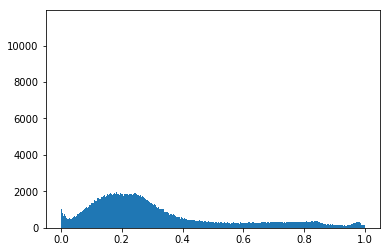

In [105]:
plt.hist(k, bins = 500)
plt.show()

In [106]:
submission = pd.DataFrame()

In [107]:
submission['member_id'] = member_id

In [108]:
submission['loan_status'] = y

In [109]:
submission.to_csv('test_submission2.csv', index=False)

{'mean_fit_time': array([ 1132.47604736]),
 'mean_score_time': array([ 9.60723527]),
 'mean_test_score': array([ 0.89652817]),
 'mean_train_score': array([ 0.99187213]),
 'param_max_depth': masked_array(data = [500],
              mask = [False],
        fill_value = ?),
 'param_max_features': masked_array(data = [None],
              mask = [False],
        fill_value = ?),
 'param_min_samples_leaf': masked_array(data = [2],
              mask = [False],
        fill_value = ?),
 'param_n_estimators': masked_array(data = [500],
              mask = [False],
        fill_value = ?),
 'params': ({'max_depth': 500,
   'max_features': None,
   'min_samples_leaf': 2,
   'n_estimators': 500},),
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([ 0.89593678]),
 'split0_train_score': array([ 0.99209751]),
 'split1_test_score': array([ 0.8974722]),
 'split1_train_score': array([ 0.99168196]),
 'split2_test_score': array([ 0.89617552]),
 'split2_train_score': array([ 0.99